19990 labeled as 1
19990 labeled as 0
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     16024
           1       0.94      0.96      0.95     15960

    accuracy                           0.95     31984
   macro avg       0.95      0.95      0.95     31984
weighted avg       0.95      0.95      0.95     31984



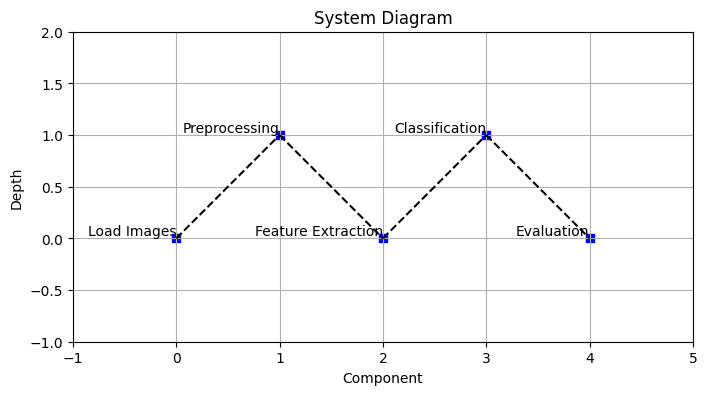

In [1]:
import os 
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# creates paths to the images 
defective_folder = "C:\\Users\\cheye\\Downloads\\itmla3_project_dataset\\CONCRETE CRACKS\\Defective"
defectless_folder = "C:\\Users\\cheye\\Downloads\\itmla3_project_dataset\\CONCRETE CRACKS\\Defectless"

def image_enhancement(image):
    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    '''the following increases saturation and decreases brightness respectively'''
    
    hsv[:,:,1] = hsv[:,:,1] * 1.5
    
    
    hsv[:,:,2] = hsv[:,:,2] * 0.8
    
    # Convert back to BGR color space so it can continue through the algorithm 
    image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return image

def feature_extraction(image):
   #grayscaling makes it easier for feature extraction 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform edge detection using Canny edge detector
    edges = cv2.Canny(gray, 100, 200)
    
    # Calculate the number of edges as a feature, this gets the number of pixels
    num_edges = np.sum(edges) / 255  
    
    # Calculate the mean intensity as a feature
    mean_intensity = np.mean(gray)
    
    
    # Concatenate the features into a feature vector
    feature_vector = [num_edges, mean_intensity]
    
    return feature_vector
'''The next 4 functions normalise,split the data and create the testing and training classifiers'''
def feature_normalization(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

def train_test_split_data(X, y, test_size=0.8, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def classifier_training(X_train, y_train):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    return clf

def classifier_testing(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    print(classification_report(y_test, y_pred))

def load_images_from_folder(folder, label): # this appends all the images as they are being processed
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)  # Load image in color mode
        img = cv2.resize(img, (224, 224))  # Resize image to a fixed size
        
        if img is not None:
            enh_img = image_enhancement(img)
            feature_vector = feature_extraction(enh_img)
            images.append(feature_vector)  # Append feature vector to images list
            labels.append(label)
    
    print(len(images), "labeled as", label)
    return images, labels

def concatenate_data(defective_images, defectless_images): #adds all images together 
    X = defective_images + defectless_images
    return X

def concatenate_labels(defective_labels, defectless_labels): #adds labels together 
    y = defective_labels + defectless_labels
    return y

def plot_system_diagram(components, connections): #this creates a diagram to show how the system is working through the algorithm
    
    plt.figure(figsize=(8, 6))

    # Plot the components
    for component, (x, y) in components.items():
        plt.scatter(x, y, marker='s', color='blue')
        plt.text(x, y, component, ha='right', va='bottom')

    # Plot the connections
    for start, end in connections:
        start_x, start_y = components[start]
        end_x, end_y = components[end]
        plt.plot([start_x, end_x], [start_y, end_y], linestyle='--', color='black')

    
    plt.xlabel('Component')
    plt.ylabel('Depth')
    plt.title('System Diagram')

    # this adjusts the aspect ratios for the plot
    plt.xlim(-1, 5)
    plt.ylim(-1, 2)
    plt.gca().set_aspect('equal', adjustable='box')

 
    plt.grid(True)
    plt.show()

def main(): #this function ensures all other functions display what is intended
    defective_images, defective_labels = load_images_from_folder(defective_folder, 1)
    defectless_images, defectless_labels = load_images_from_folder(defectless_folder, 0)

  
    X = concatenate_data(defective_images, defectless_images)
    y = concatenate_labels(defective_labels, defectless_labels)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split_data(X, y)

    # Feature normalization
    X_train_scaled, X_test_scaled = feature_normalization(X_train, X_test)

    # Train the classifier
    clf = classifier_training(X_train_scaled, y_train)

    # Test the classifier
    classifier_testing(clf, X_test_scaled, y_test)

    components = {
        'Load Images': (0, 0),
        'Preprocessing': (1, 1),
        'Feature Extraction': (2, 0),
        'Classification': (3, 1),
        'Evaluation': (4, 0)
    }

    connections = [
        ('Load Images', 'Preprocessing'),
        ('Preprocessing', 'Feature Extraction'),
        ('Feature Extraction', 'Classification'),
        ('Classification', 'Evaluation')
    ]

    #this calls the system diagram 
    plot_system_diagram(components, connections)


if __name__ == "__main__":
    main()